Цель: построить модель которая отфлагует меня как того кого возьмут в компанию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [49]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [4]:
df.shape

(19158, 13)

In [5]:
'''
Описание колонок датасета:

    0. enrollee_id               : уникальный id кандидата (ключ)
    1. city                      : код города кандидата
    2. city_development_index    : уровень развития города кандидата
    3. gender                    : пол кандидата
    4. relevent_experience       : флаг наличие релевантного опыта кандидата
    5. enrolled_university       : флаг прохождения тематического курса 
    6. education_level           : уровень образования кандидата
    7. major_discipline          : специальность кандидата в университете
    8. experience                : лет рабочего опыта кандидата
    9. company_size              : размер нанимающей организации
    10. company_type             : тип нанимающей организации
    11. training_hours           : часов практики, пройденных кандидатом
    12. target                   : флаг устройства на позицию
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [6]:
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [7]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

дропаем айди потому что не нужен

In [50]:
df = df.drop('enrollee_id', axis=1)
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


Также дропаем эти потому что их нельзя заполнить самым частым по смыслу

In [51]:
df = df.dropna(subset=['gender', 'company_size', 'company_type'])

display(df.shape)
df.isna().sum()

(9791, 12)

city                        0
city_development_index    240
gender                      0
relevent_experience         0
enrolled_university        72
education_level            79
major_discipline          745
experience                  6
company_size                0
company_type                0
training_hours            373
target                      0
dtype: int64

получили размер сэмпла около 10к - устраивает

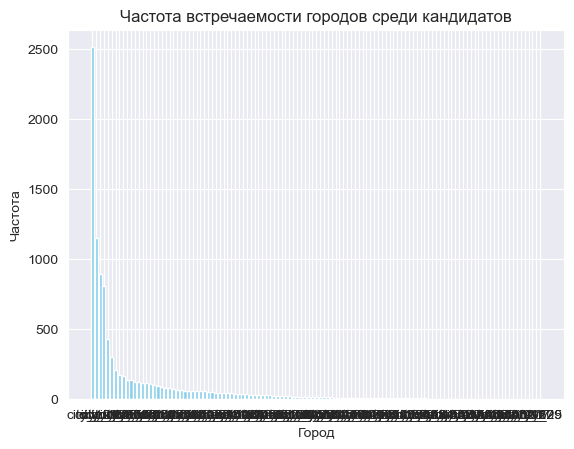

In [53]:
cities = df['city'].value_counts().reset_index()
plt.bar(cities['index'], cities['city'], color='skyblue')

plt.title('Частота встречаемости городов среди кандидатов')
plt.xlabel('Город')
plt.ylabel('Частота')

plt.show()

Распределение очень скошенное, можно вычистить непопулярные города, заменив значение например на 'other'

In [54]:
rare_cities = cities[cities['city'] < 20]['index'].tolist()
df.loc[df['city'].isin(rare_cities), 'city'] = 'other'

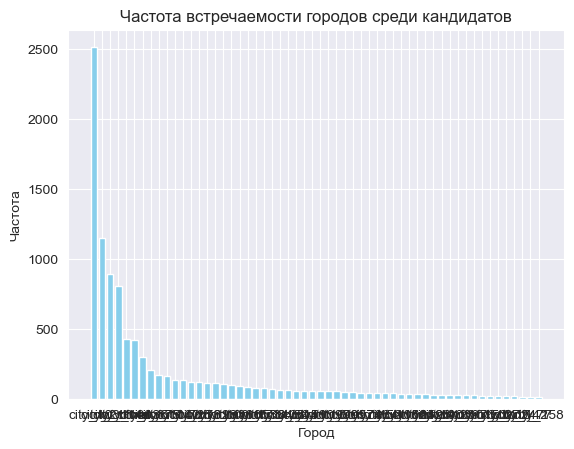

In [55]:
cities = df['city'].value_counts().reset_index()
plt.bar(cities['index'], cities['city'], color='skyblue')

plt.title('Частота встречаемости городов среди кандидатов')
plt.xlabel('Город')
plt.ylabel('Частота')

plt.show()

отлично, городов стало меньше - мы снизили кол-во шума в данных

проводим предобработку: 
- отскейлим числовые данные, заполним нулевые значения медианой
- для категориальных используем OHE, нуллы заполним самым часто встречающимся значением, дропнем первые столбцы чтобы избежать мультиколлениарности (новых значений в колонках мы не ожидаем, поэтому можно так делать)

In [52]:
X = df.drop('target', axis=1)
y = df['target']

In [56]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(exclude=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

X_train = preprocessor.fit_transform(X_train).toarray()
X_test = preprocessor.transform(X_test).toarray()

encoded_cat_columns = preprocessor.named_transformers_['categorical']['onehot'].get_feature_names_out(
    input_features=categorical_features)

X_train = pd.DataFrame(X_train, columns=(numeric_features + list(encoded_cat_columns)))
X_test = pd.DataFrame(X_test, columns=(numeric_features + list(encoded_cat_columns)))

/Users/ilnur/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


начало визуализации

изучим числовые признаки

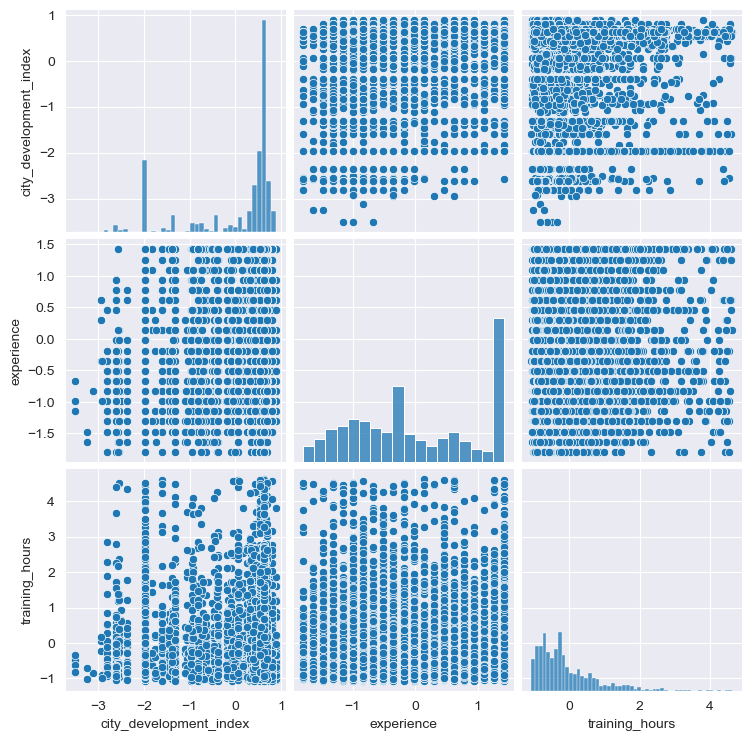

In [26]:
sns.pairplot(X_train[X_train.columns[:3]])
plt.show()

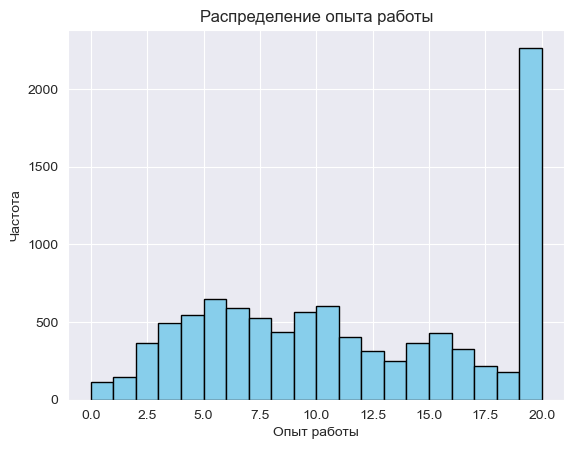

In [15]:
plt.hist(df['experience'], bins=20, color='skyblue', edgecolor='black')

plt.title('Распределение опыта работы')
plt.xlabel('Опыт работы')
plt.ylabel('Частота')

plt.show()

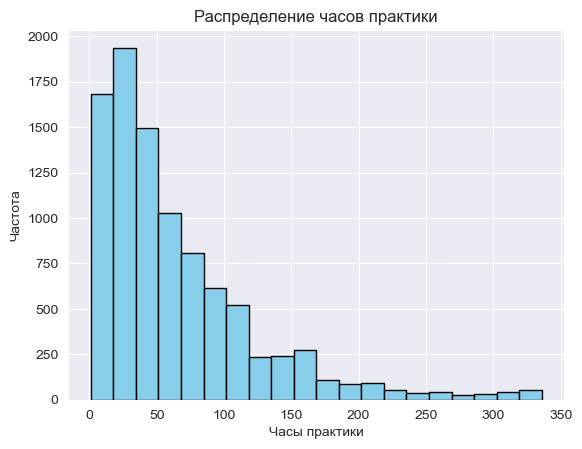

In [27]:
plt.hist(df['training_hours'], bins=20, color='skyblue', edgecolor='black')

plt.title('Распределение часов практики')
plt.xlabel('Часы практики')
plt.ylabel('Частота')

plt.show()

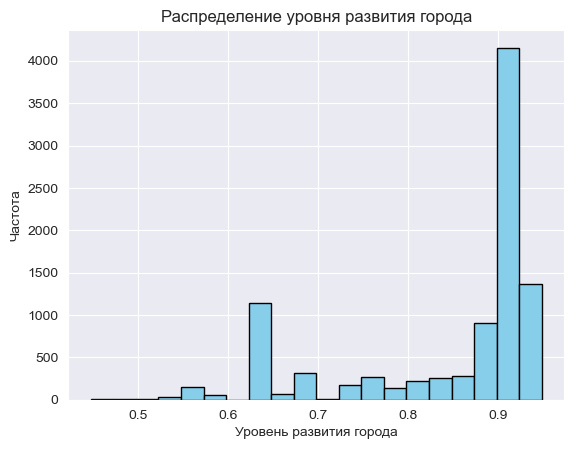

In [28]:
plt.hist(df['city_development_index'], bins=20, color='skyblue', edgecolor='black')

plt.title('Распределение уровня развития города')
plt.xlabel('Уровень развития города')
plt.ylabel('Частота')

plt.show()

In [ ]:
X = df.drop('target', axis=1)
# X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
# если у нас присутствует дисбаланс классов, то stratify добивается примерно равной дол

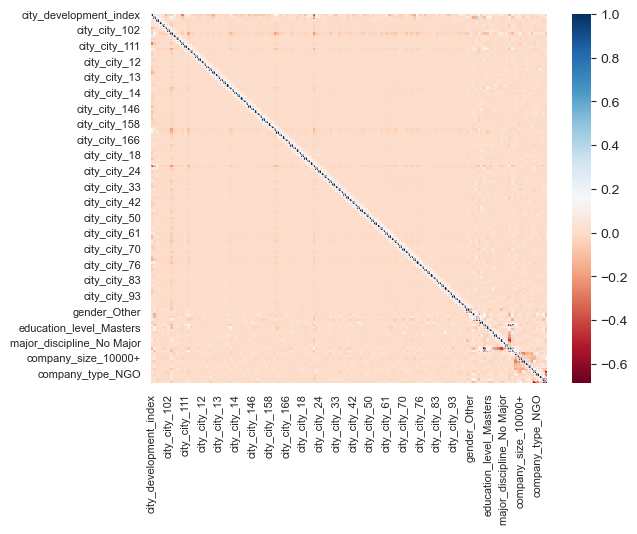

In [57]:
ax = sns.heatmap(X_train.corr(method='pearson'), annot=True, fmt=".2f", cmap="RdBu",
                 annot_kws={"size": 5})

for text in ax.texts:
    if abs(float(text.get_text())) < 0.5:
        text.set_text('')

plt.gcf().axes[0].tick_params(labelsize=8)
plt.show()

+ планирую смотреть распределение признаков в разрезе по целевой переменной (с помощью боксплотов, вайолинплотов ...)

изучим категориальные признаки

In [ ]:
# нормальное оформление будет ))